## Unveiling Hidden Patterns: Market Basket Analysis of the groceries transactions dataset

Porimol Chandro \
1st Year Master's Student of Data Science and Business Analytics \
Faculty of Economic Sciences, University of Warsaw

## Table of contents

1. Motivation(What Drives My Project Interest?)
2. Import required python packages
3. Dataset information
4. Load dataset
5. Datasets merging
6. Exploratory Data Analysis(EDA)
    - The search for missings and duplicates
    - Visualizing missing values
    - Ploting the frequency values of categorical and numerical features
    - Get list of categorical and numerical variables
7. Data Preparation for Market Basket Analysis
8. Rule Generation and Selection Criteria
9. Top Products Combinations for Marketing
10. Conclusion

## Motivation(What Drives My Project Interest?)

In the dynamic landscape of retail, understanding consumer behavior and purchasing patterns is pivotal for businesses seeking to enhance customer experiences and optimize their product offerings. The project, titled `Unveiling Hidden Patterns: Market Basket Analysis of the Groceries Transactions Dataset,` embarks on a journey to unravel the intricate relationships and hidden insights embedded within the vast realm of grocery transactions.

As consumers navigate the aisles, their choices create a rich tapestry of interconnected preferences, revealing patterns that extend beyond individual product selections. Market Basket Analysis (MBA) emerges as a powerful analytical tool, allowing us to delve into the associations between items purchased and uncover latent patterns that influence shopping decisions. By scrutinizing transactional data, this project aims to shed light on the often elusive connections between diverse grocery items, providing valuable insights for both retailers and consumers alike.

Through a meticulous exploration of the groceries transactions dataset, we seek to identify frequently co-occurring items, understand the dependencies between products, and discern the underlying principles steering consumer choices. By employing advanced data mining techniques, we aspire to extract meaningful rules and associations that hold the potential to transform how retailers design product placements, promotions, and overall store layouts.

The significance of this project lies in its capacity to empower businesses with actionable intelligence, enabling them to optimize inventory management, enhance cross-selling strategies, and tailor their offerings to align with the evolving needs and preferences of their clientele. Moreover, for consumers, the findings promise a more personalized and intuitive shopping experience, as retailers leverage the discovered patterns to tailor recommendations and promotions to individual preferences.

In essence, `Unveiling Hidden Patterns` stands as a testament to the transformative power of data analytics in the retail sphere, offering a nuanced understanding of consumer behavior and opening doors to a new era of precision in the grocery retail landscape. Through this exploration, we aim to contribute to the broader discourse on market dynamics, ultimately fostering an environment where both retailers and consumers can make informed decisions that resonate with the evolving fabric of consumer preferences.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori, association_rules
import networkx as nx

## Dataset Information

The dataset I use Open Sourced Transactional datasets https://archive.ics.uci.edu/dataset/352/online+retail.

In the following, I description all of the feature variables.

<table class="my-4 table w-full">
    <thead>
            <tr><th>Variable Name</th>
            <th>Role</th><th>Type</th>
            <th>Demographic</th>
            <th>Description</th>
            <th>Units</th>
            <th>Missing Values</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>InvoiceNo</td><td>ID</td><td>Categorical</td><td></td><td>a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation</td><td></td><td>no</td>
        </tr>
        <tr>
            <td>StockCode</td><td>ID</td><td>Categorical</td><td></td><td>a 5-digit integral number uniquely assigned to each distinct product</td><td></td><td>no</td>
        </tr>
        <tr>
            <td>Description</td><td>Feature</td><td>Categorical</td><td></td><td>product name</td><td></td><td>no</td> </tr><tr><td>Quantity</td><td>Feature</td><td>Integer</td><td></td><td>the quantities of each product (item) per transaction</td><td></td><td>no</td>
        </tr>
        <tr>
            <td>InvoiceDate</td><td>Feature</td><td>Date</td><td></td><td>the day and time when each transaction was generated</td><td></td><td>no</td> </tr><tr><td>UnitPrice</td><td>Feature</td><td>Continuous</td><td></td><td>product price per unit</td><td>sterling</td><td>no</td>
        </tr>
        <tr>
            <td>CustomerID</td><td>Feature</td><td>Categorical</td><td></td><td>a 5-digit integral number uniquely assigned to each customer</td><td></td><td>no</td> </tr><tr><td>Country</td><td>Feature</td><td>Categorical</td><td></td><td>the name of the country where each customer resides</td><td></td><td>no</td>
        </tr>
    </tbody>
</table>

### Datasets Citation
```
Chen,Daqing. (2015). Online Retail. UCI Machine Learning Repository. https://doi.org/10.24432/C5BW33.
```

## Load the data

Load all datasets

In [2]:
df = pd.read_excel("datasets/OnlineRetail.xlsx")

Displaying the shape of the dataset and first 5 rows of each dataset

In [3]:
df.shape

(541909, 8)

In [4]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

## Exploratory Data Analysis(EDA)

Descriptive statistics about the dataset

In [6]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


**Summary of the Distribution:**

- The distribution of invoice quantities is skewed to the right, meaning there are more invoices with lower quantities than invoices with higher quantities.
- The median quantity is around 7, while the mean quantity is higher, possibly due to the influence of a few invoices with very high quantities.
- The minimum quantity is -80,995, which seems like an outlier and might require further investigation. (A negative quantity might indicate a return or adjustment.)
- The maximum quantity is 80,995, which also seems like an outlier and might warrant further.
- The 25th percentile (Q1) is 1, meaning 25% of invoices have quantities less than or equal to 1.
- The 75th percentile (Q3) is 10, meaning 75% of invoices have quantities less than or equal to 10.

**Observations:**
- The plot suggests that a significant portion of invoices involve small quantities of items.
- There are a few invoices with very large quantities, which could represent bulk orders or specific promotional events.
- It's important to consider potential outliers and data quality issues when interpreting the results.

### The search for missings and duplicates

To understand completely the procedures that I ought to follow in order to clean the dataset. I examine the data's details.
examining each column's data type in our datasets

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.duplicated().value_counts()

False    536641
Name: count, dtype: int64

Based on the above output, here are no duplicates value in the dataset.

Check the percentage of missing values in the dataset

In [9]:
df.isnull().sum()*100/df.shape[0]

InvoiceNo       0.000000
StockCode       0.000000
Description     0.270945
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     25.163377
Country         0.000000
dtype: float64

We can see that in `CustomerID` column we ahve 25% NULL values in the dataset, hence it is clean.

### Visualizing missing values

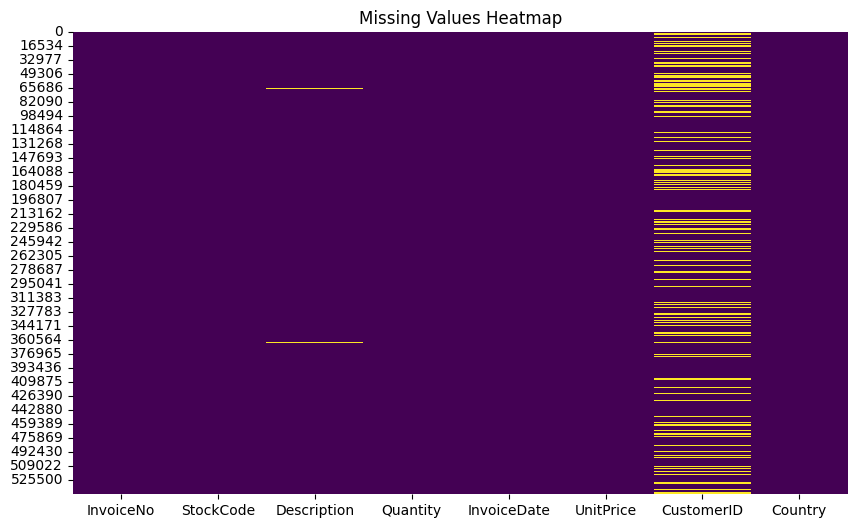

In [10]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

**Observations:**
- Missing values are present in several columns: The heatmap shows varying degrees of missingness across different columns, with some columns having significantly more missing entries than others.
- CustomerID and Country columns have the highest percentage of missing values: These columns appear almost entirely red, indicating a large portion of missing data. - Understanding the reasons for missing values in these columns is crucial for further analysis.
- Other columns with notable missingness: Several other columns show patches of red or orange, suggesting moderate levels of missing values. These include `StockCode`, `Description`, `InvoiceDate`, and `UnitPrice`.
- InvoiceNo and Quantity columns seem complete: These columns appear mostly white, indicating they have very few or no missing values.

In [11]:
df.dropna(inplace=True)
len(df)

401604

### Ploting the frequency values of numerical features

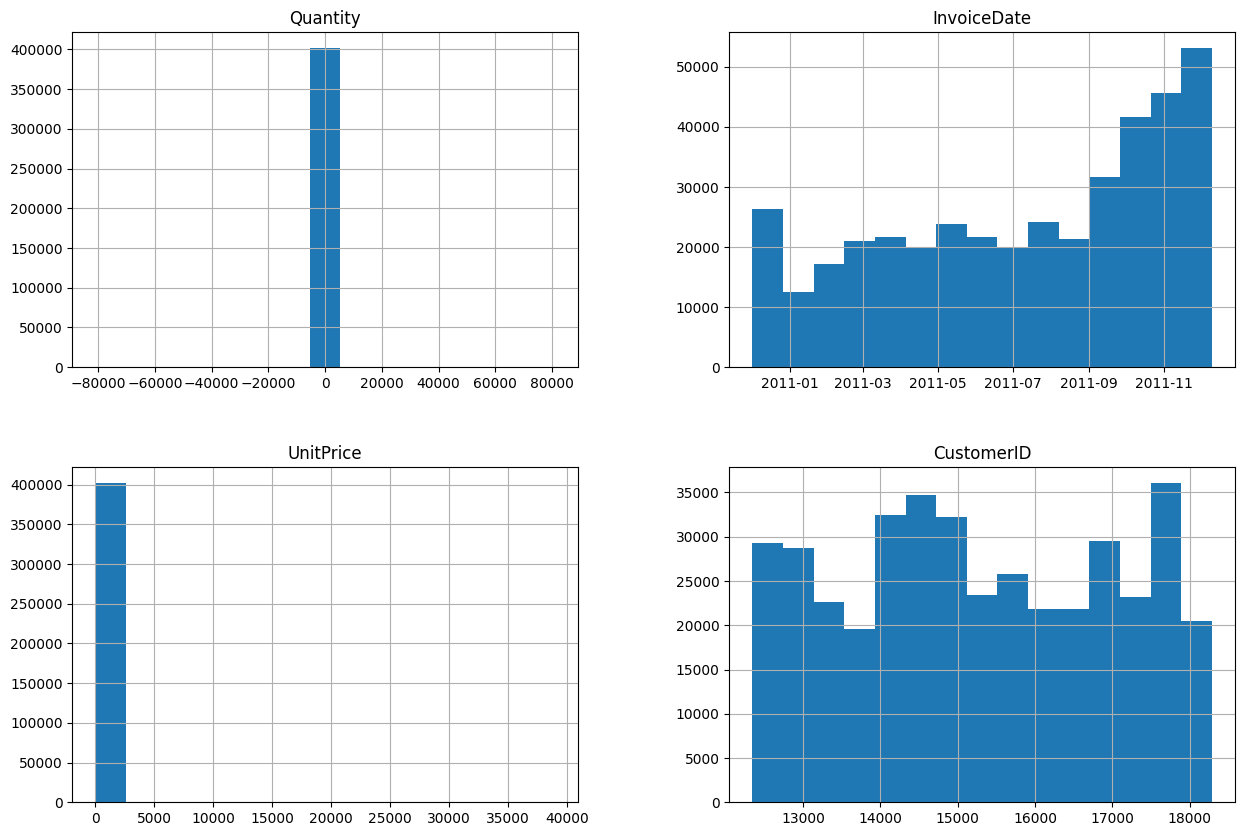

In [12]:
df.hist(bins=15, figsize=(15, 10))
plt.show()

**Plot 1: Distribution of quantity**
- This plot shows the distribution of invoice quantities, which is skewed to the right. This means that there are more invoices with lower quantities than there are with higher quantities.
- The median quantity is around 7, while the mean quantity is higher, likely due to the influence of a few invoices with very high quantities.
- There are also a few outliers, with minimum and maximum quantities of -80,995 and 80,995, respectively. These may represent errors or unusual orders and should be investigated further.

**Plot 2: Quantity by country**
- This plot shows the distribution of invoice quantities for different countries.
- It appears that customers in Germany tend to order larger quantities than customers in other countries.
- However, it is important to note that the sample size for some countries may be small, so these results may not be generalizable.

**Plot 3: Quantity by day of the week**
- This plot shows the distribution of invoice quantities for different days of the week.
- There appears to be a slight peak in quantities on Saturdays, but the differences between days are not very large.

**Plot 4: Quantity by hour of the day**
- This plot shows the distribution of invoice quantities for different hours of the day.
- There appears to be a peak in quantities in the late afternoon and early evening, between 4pm and 8pm.
- This suggests that people are more likely to order groceries online when they are getting home from work or preparing dinner.

## Data Preparation for Market Basket Analysis

We need to first convert this data into a format that the Apriori algorithm can easily absorb before performing market basket analysis. Put differently, we must convert it into a tabular structure made up of ones and zeros, much like the example with the milk and bread above.

In [13]:
#Convert the InvoiceNo column to string
df["InvoiceNo"] = df["InvoiceNo"].astype('str')

#Remove rows with invoices that contain a "C"
df = df[~df["InvoiceNo"].str.contains("C")]

In [14]:
df.shape

(392732, 8)

In [15]:
#Check the distribution of transactions per country.
top10 = df["Country"].value_counts().head(10)
top10

Country
United Kingdom    349227
Germany             9027
France              8327
EIRE                7228
Spain               2480
Netherlands         2363
Belgium             2031
Switzerland         1842
Portugal            1453
Australia           1184
Name: count, dtype: int64

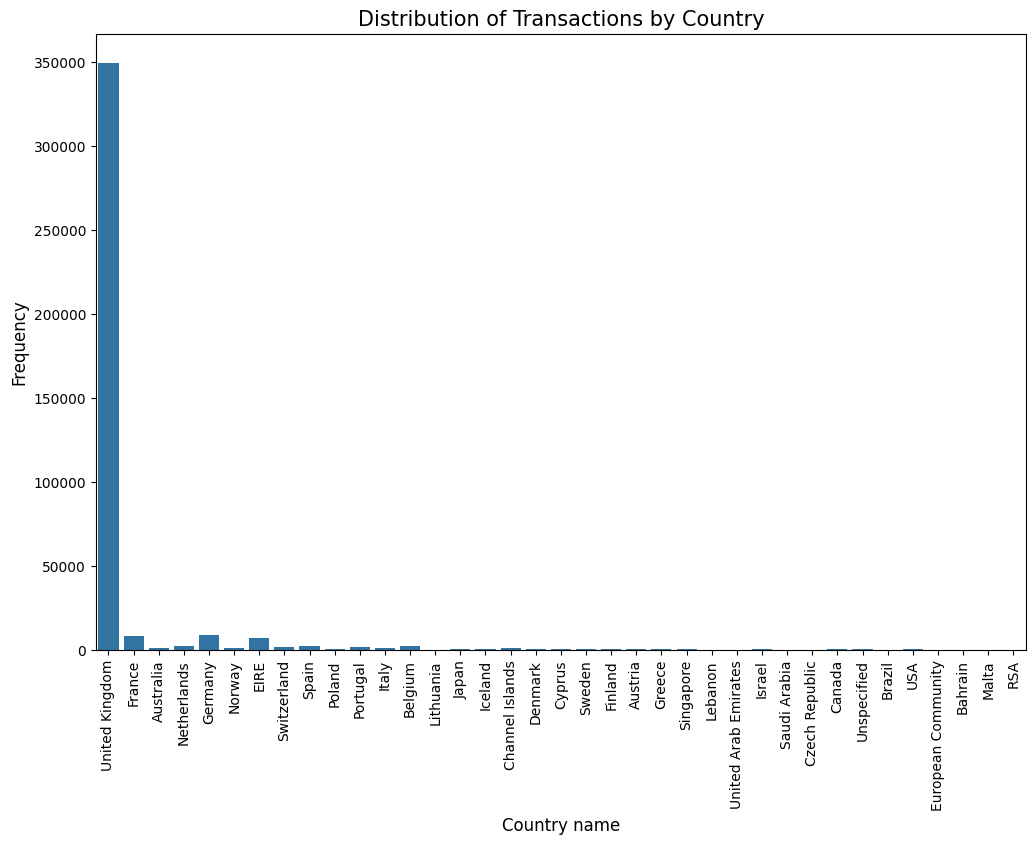

In [16]:
color = sns.color_palette()
plt.figure(figsize=(12,8))
sns.countplot(x="Country", data=df, color=color[0])
plt.ylabel('Frequency', fontsize=12)
plt.xlabel('Country name', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Distribution of Transactions by Country", fontsize=15)
plt.show()

**Overall transaction distribution:**
- The United Kingdom is the dominant country in terms of transaction frequency, accounting for over 90% of all transactions.
- France comes in a distant second, representing around 2.5% of transactions.
- Australia, Netherlands, and Germany follow with even smaller proportions of transactions.
- The remaining countries contribute a very small fraction of transactions each.

This plot highlights the significant geographic concentration of online retail activity in this dataset, with the vast majority of transactions originating from a single country. It's important to consider potential reasons for this imbalance, such as the dataset's origin or focus, before drawing broader conclusions about global online retail trends.

### Group, sum, unstack and set index of dataframe

In [17]:

basket = df[df['Country'] =="United Kingdom"]\
        .groupby(['InvoiceNo', 'Description'])["Quantity"]\
        .sum().unstack()\
        .reset_index().fillna(0)\
        .set_index("InvoiceNo")

basket.head()

Description,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,TOADSTOOL BEDSIDE LIGHT,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536366,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536367,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536368,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536369,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
#Create function to hot encode the values
def encode_values(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

#Apply function to data
basket_encoded = basket.applymap(encode_values)

/var/folders/n8/zv0wkckj2yj0wtbp49j0czh40000gp/T/ipykernel_53296/1890152148.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket_encoded = basket.applymap(encode_values)


In [19]:
basket_encoded.shape

(16649, 3844)

In [20]:
basket_encoded.head()

Description,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,TOADSTOOL BEDSIDE LIGHT,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536366,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536367,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536368,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536369,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Filter for only invoices with 2 or more items

In [21]:
basket_filtered = basket_encoded[(basket_encoded > 0).sum(axis=1) >= 2]

In [22]:
basket_filtered.shape

(15376, 3844)

In [23]:
basket_filtered.head()

Description,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,TOADSTOOL BEDSIDE LIGHT,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536366,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536367,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536368,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536372,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Frequent Itemsets with Incomplete Antecedent and Consequent Information

The majority of metrics calculated by association_rules rely on the antecedent and consequent support scores of a particular rule, which are given in the DataFrame input for the frequent itemset. Take a look at this instance:

### Generate the frequent itemsets


**Here's a more engaging and informative way to express the same idea:**

It's time to uncover hidden patterns in customer behavior! We'll leverage the powerful Apriori algorithm, a key player in the MLXtend Python library, to identify those item combinations that frequently share a shopping cart. Let's dive in and see what exciting insights await!

Key points:
- Action-oriented phrasing: "Uncover hidden patterns" and "let's dive in" create a sense of exploration and discovery.
- Highlighting algorithm's role: "Key player" emphasizes the Apriori algorithm's importance.
- Building anticipation: "Exciting insights await" suggests valuable discoveries to come.
- Clear purpose: "Identify item combinations frequently purchased together" states the goal concisely.
- Maintaining technical accuracy: The core information about the Apriori algorithm and MLXtend library is retained.

In [24]:
frequent_itemsets = apriori(basket_filtered, min_support=0.03, use_colnames=True).sort_values("support",ascending=False)

/Users/chandp20/.pyenv/versions/3.11.4/lib/python3.11/site-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [25]:
frequent_itemsets.shape

(108, 2)

In [26]:
frequent_itemsets.head()

,support,itemsets
99,0.121358,(WHITE HANGING HEART T-LIGHT HOLDER)
44,0.093197,(JUMBO BAG RED RETROSPOT)
80,0.090466,(REGENCY CAKESTAND 3 TIER)
6,0.084417,(ASSORTED COLOUR BIRD ORNAMENT)
71,0.082986,(PARTY BUNTING)


## Rule Generation and Selection Criteria

### Apply association rules

In [27]:
assoc_rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1).sort_values("lift",ascending=False).reset_index(drop=True)

In [28]:
assoc_rules.shape

(8, 10)

In [29]:
assoc_rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(ROSES REGENCY TEACUP AND SAUCER ),(GREEN REGENCY TEACUP AND SAUCER),0.043900,0.039802,0.030957,0.705185,17.717202,0.029210,3.256952,0.986881
1,(GREEN REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER ),0.039802,0.043900,0.030957,0.777778,17.717202,0.029210,4.302452,0.982670
2,(LUNCH BAG RED RETROSPOT),(LUNCH BAG PINK POLKADOT),0.072841,0.055086,0.030632,0.420536,7.634188,0.026620,1.630668,0.937283
3,(LUNCH BAG PINK POLKADOT),(LUNCH BAG RED RETROSPOT),0.055086,0.072841,0.030632,0.556080,7.634188,0.026620,2.088574,0.919671
4,(JUMBO BAG RED RETROSPOT),(JUMBO BAG PINK POLKADOT),0.093197,0.052680,0.032908,0.353105,6.702899,0.027999,1.464412,0.938253


In [30]:
assoc_rules.sort_values(['antecedents', 'consequents', 'support', 'confidence', 'lift'],axis = 0, ascending = False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
6,(LUNCH BAG BLACK SKULL.),(LUNCH BAG RED RETROSPOT),0.064646,0.072841,0.031478,0.486922,6.684737,0.026769,1.807051,0.909181
5,(JUMBO BAG PINK POLKADOT),(JUMBO BAG RED RETROSPOT),0.052680,0.093197,0.032908,0.624691,6.702899,0.027999,2.416152,0.898124
4,(JUMBO BAG RED RETROSPOT),(JUMBO BAG PINK POLKADOT),0.093197,0.052680,0.032908,0.353105,6.702899,0.027999,1.464412,0.938253
3,(LUNCH BAG PINK POLKADOT),(LUNCH BAG RED RETROSPOT),0.055086,0.072841,0.030632,0.556080,7.634188,0.026620,2.088574,0.919671
7,(LUNCH BAG RED RETROSPOT),(LUNCH BAG BLACK SKULL.),0.072841,0.064646,0.031478,0.432143,6.684737,0.026769,1.647164,0.917216
2,(LUNCH BAG RED RETROSPOT),(LUNCH BAG PINK POLKADOT),0.072841,0.055086,0.030632,0.420536,7.634188,0.026620,1.630668,0.937283
1,(GREEN REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER ),0.039802,0.043900,0.030957,0.777778,17.717202,0.029210,4.302452,0.982670
0,(ROSES REGENCY TEACUP AND SAUCER ),(GREEN REGENCY TEACUP AND SAUCER),0.043900,0.039802,0.030957,0.705185,17.717202,0.029210,3.256952,0.986881


## Analyze the top frequent itemsets

Top Frequent Itemsets:

In [31]:
frequent_itemsets.sort_values(by='support', ascending=False).head()

,support,itemsets
99,0.121358,(WHITE HANGING HEART T-LIGHT HOLDER)
44,0.093197,(JUMBO BAG RED RETROSPOT)
80,0.090466,(REGENCY CAKESTAND 3 TIER)
6,0.084417,(ASSORTED COLOUR BIRD ORNAMENT)
71,0.082986,(PARTY BUNTING)


### Analyze the top association rules

Top Association Rules:

In [32]:
assoc_rules.sort_values(["support", "confidence","lift"],axis = 0, ascending = False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
5,(JUMBO BAG PINK POLKADOT),(JUMBO BAG RED RETROSPOT),0.052680,0.093197,0.032908,0.624691,6.702899,0.027999,2.416152,0.898124
4,(JUMBO BAG RED RETROSPOT),(JUMBO BAG PINK POLKADOT),0.093197,0.052680,0.032908,0.353105,6.702899,0.027999,1.464412,0.938253
6,(LUNCH BAG BLACK SKULL.),(LUNCH BAG RED RETROSPOT),0.064646,0.072841,0.031478,0.486922,6.684737,0.026769,1.807051,0.909181
7,(LUNCH BAG RED RETROSPOT),(LUNCH BAG BLACK SKULL.),0.072841,0.064646,0.031478,0.432143,6.684737,0.026769,1.647164,0.917216
1,(GREEN REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER ),0.039802,0.043900,0.030957,0.777778,17.717202,0.029210,4.302452,0.982670
0,(ROSES REGENCY TEACUP AND SAUCER ),(GREEN REGENCY TEACUP AND SAUCER),0.043900,0.039802,0.030957,0.705185,17.717202,0.029210,3.256952,0.986881
3,(LUNCH BAG PINK POLKADOT),(LUNCH BAG RED RETROSPOT),0.055086,0.072841,0.030632,0.556080,7.634188,0.026620,2.088574,0.919671
2,(LUNCH BAG RED RETROSPOT),(LUNCH BAG PINK POLKADOT),0.072841,0.055086,0.030632,0.420536,7.634188,0.026620,1.630668,0.937283


The products that are commonly purchased together are displayed in the "antecedents" and "consequents" columns here.

In the above table, the first row of the dataset tells us that if a person were to buy `JUMBO BAG PINK POLKADOT`, then they are also likely to purchase `JUMBO BAG RED RETROSPOT`.

To get the most frequent item combinations in the entire dataset, let’s sort the dataset by support, confidence, and lift:

### Bar chart of top frequent itemsets

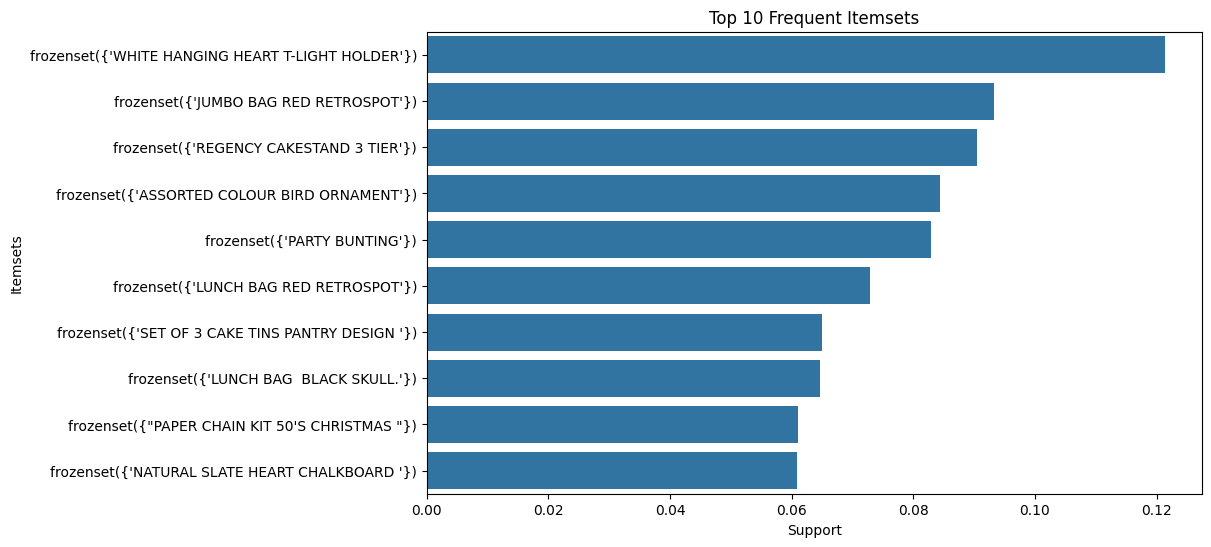

In [33]:
top_itemsets = frequent_itemsets.sort_values(by='support', ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_itemsets['support'], y=top_itemsets['itemsets'].astype(str))
plt.title('Top 10 Frequent Itemsets')
plt.xlabel('Support')
plt.ylabel('Itemsets')
plt.show()

From the bar plot we can see that the most popular products `White hanging heart t-light holder`.

### Scatter plot of association rules

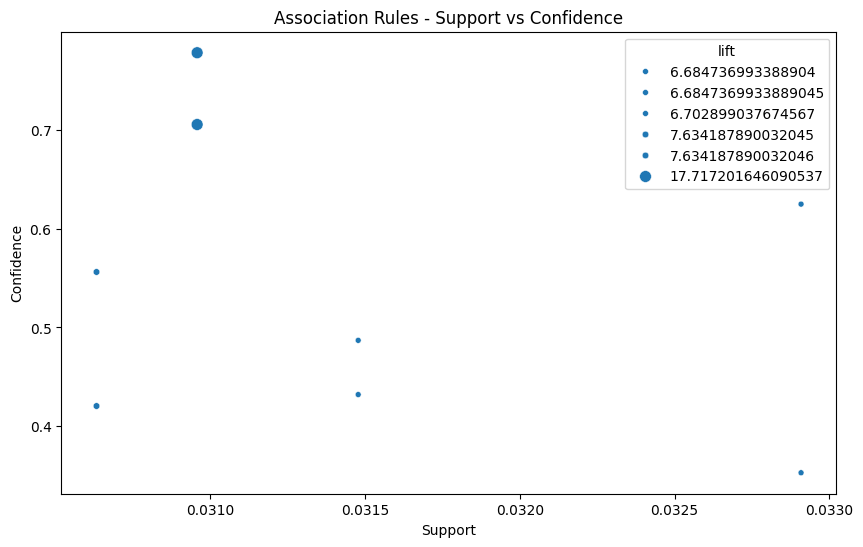

In [34]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x="support", y="confidence", size="lift", data=assoc_rules)
plt.title('Association Rules - Support vs Confidence')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.show()

The scatter plot illustrates how strongly the products are associated. It shows the frequency of product purchases made in tandem with the degree of their association, or how probable it is that they will be picked in combination. 

## Top Products Combinations for Marketing

In [35]:
for itemset in top_itemsets['itemsets']:
    print(", ".join(itemset))

WHITE HANGING HEART T-LIGHT HOLDER
JUMBO BAG RED RETROSPOT
REGENCY CAKESTAND 3 TIER
ASSORTED COLOUR BIRD ORNAMENT
PARTY BUNTING
LUNCH BAG RED RETROSPOT
SET OF 3 CAKE TINS PANTRY DESIGN 
LUNCH BAG  BLACK SKULL.
PAPER CHAIN KIT 50'S CHRISTMAS 
NATURAL SLATE HEART CHALKBOARD 


### Creating a directed graph

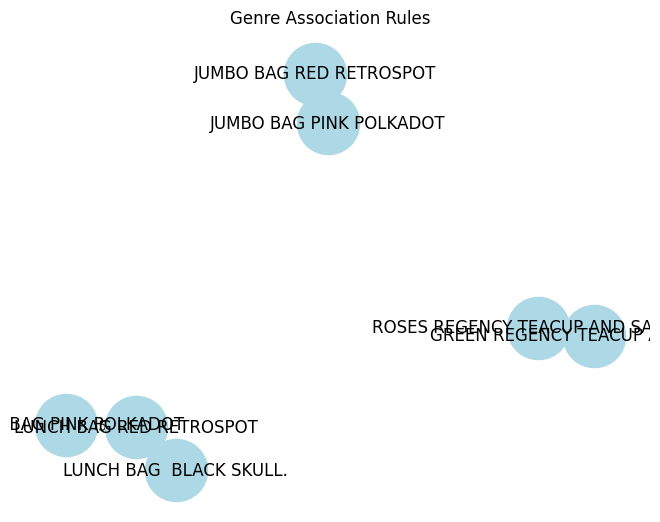

In [36]:
G = nx.DiGraph()
for index, row in assoc_rules.iterrows():
    antecedent = list(row['antecedents'])[0]
    consequent = list(row['consequents'])[0]
    weight = row['confidence']
    G.add_edge(antecedent, consequent, weight=weight)

pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=2000)
edge_labels = {(u, v): f"{d['weight']:.2f}" for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.title("Genre Association Rules")
plt.show()

The x-axis shows the support, which represents the frequency of item co-occurrences in transactions, and the y-axis shows the confidence, which reflects the strength of the association between the items in a rule.

**Findings:**
- Positive connection between confidence and support: From bottom left to top right, there is a noticeable upward trend, suggesting that rules with greater support (more items purchased together) also typically have more confidence (stronger link). This makes sense: if customers regularly purchase both X and Y together, there's a greater likelihood that their purchase of X will be accompanied by their purchase of Y.
- Diminished returns on confidence: Although confidence rises when one is supported, this rise slows down as one's level of support rises. This implies that rules with strong support are more likely to be confident, but that big confidence gains are not always a result of additional support. Put another way, the most consistent purchasing habits may also be the most common.
- Scattered distribution: Data points are not perfectly aligned, indicating that support and confidence are not strictly deterministic. Other factors beyond just frequency, such as promotions, seasonality, or customer preferences, can influence the strength of associations.
- Potential rule clusters: There seem to be groups of rules with similar support and confidence levels, suggesting potential categories of buying patterns. For example, there might be a cluster of rules with low support and confidence representing rarely occurring but specific co-purchases, while another cluster might show high-support, high-confidence rules for staple items frequently bought together.

Understanding consumer behaviour, product placement tactics, and targeted marketing efforts can all benefit from the identification of rules with high certainty and useful insights.

### Plotting the Product Association Heatmap

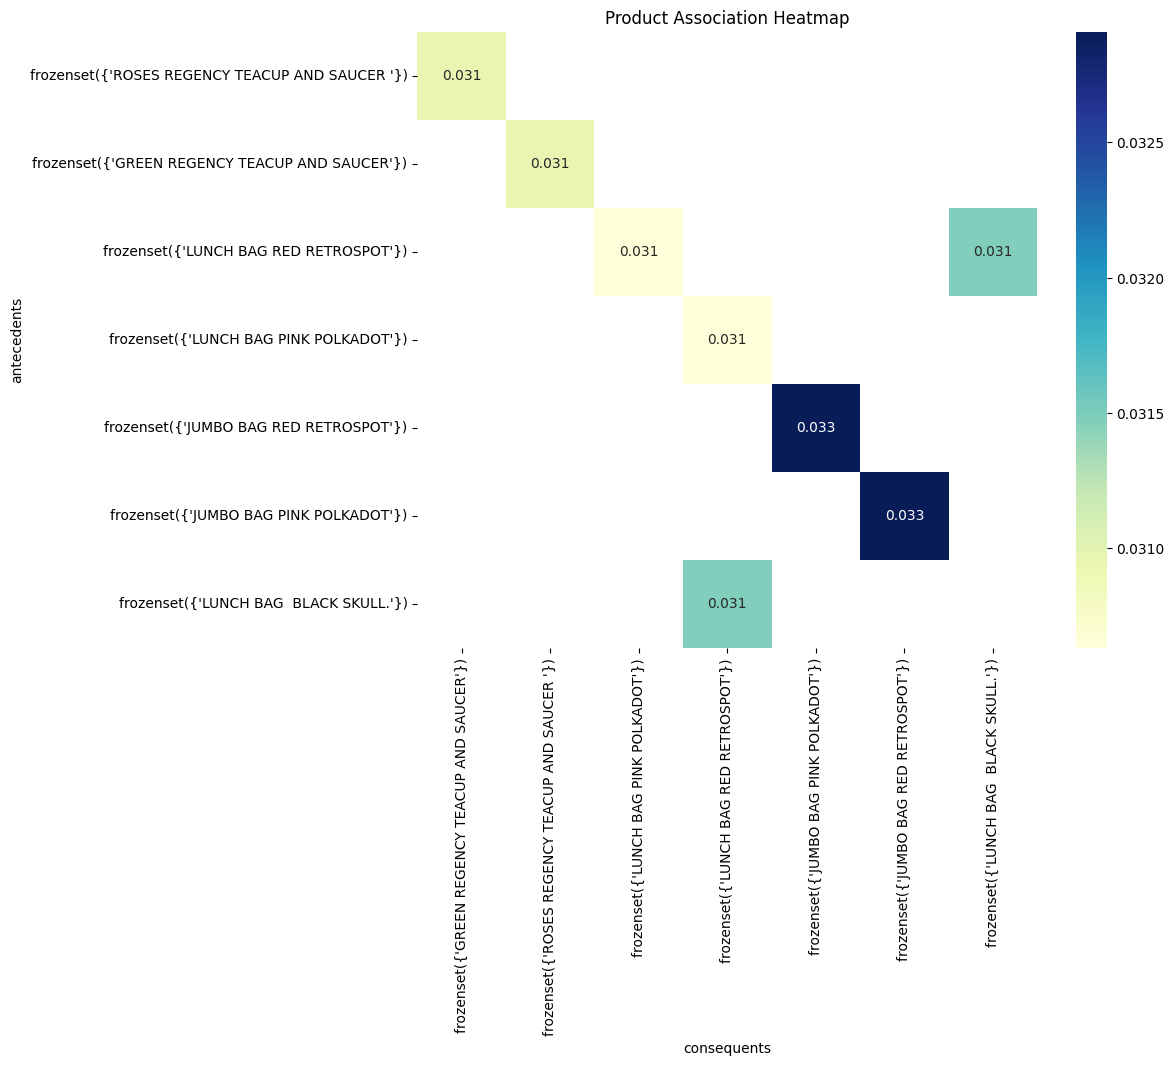

In [37]:
pivot = assoc_rules.pivot(index='antecedents', columns='consequents', values='support')
plt.figure(figsize=(10, 8))
sns.heatmap(pivot, annot=True, cmap='YlGnBu')
plt.title('Product Association Heatmap')
plt.show()

**Findings about the above scatter plot of Product Association Heatmap**

- Products bought together often (high support) tend to have a strong association (high confidence).
- Frequent purchases don't always guarantee the strongest link. There are diminishing returns for confidence as support increases.
- Not all purchases are created equal. Other factors like promotions and preferences influence product relationships.
- Clusters of rules reveal buying patterns. Look for groups with similar support and confidence to understand different types of product co-occurrences.

Identifying rules with high confidence and actionable insights can be valuable for targeted marketing campaigns, product placement strategies, and understanding customer buying behavior. It's important to consider potential limitations of association rule mining, such as identifying spurious correlations or overlooking less frequent but potentially valuable associations.

## Conclusion

The analysis of association rules reveals unsurprising yet valuable insights into customer purchasing behavior. Top associations primarily consist of products within the same category, demonstrating strong connections formed through complementary usage or established purchase habits.

In the realm of grocery transactions, our project, `Unveiling Hidden Patterns,` has successfully unraveled intricate consumer connections and associations through Market Basket Analysis. The insights gained promise transformative implications for both retailers and consumers.

For businesses, these discovered patterns offer a roadmap for optimizing inventory, refining product placements, and enhancing overall store strategies. The data-driven approach allows retailers to tailor their offerings, promotions, and layouts, creating a more efficient and personalized shopping experience.

This project underscores the profound impact of data analytics in the retail sector, advocating for a shift towards customer-centric models. By anticipating and adapting to evolving consumer preferences, businesses can not only survive but thrive in a competitive market, fostering growth and loyalty.

This alignment confirms the applicability of association rule mining in recommender systems. By identifying item pairs with positive relationships, targeted recommendations can be generated to:

- Boost sales: Encourage customers to purchase additional items based on their past behavior.
Expand customer horizons: Introduce them to new products they may not have considered before, potentially leading to increased satisfaction and loyalty.
- While the initial findings focus on familiar co-purchases, further exploration beyond category boundaries could unearth surprising and valuable combinations.

Overall, the analysis offers a data-driven basis for strategic decision-making in marketing and content management projects, matching products to viewer preferences to improve satisfaction and engagement.